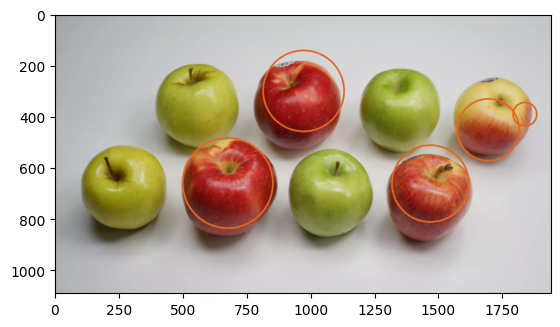

In [11]:
import cv2
from cv2 import typing
import numpy as np
from matplotlib import pyplot as plt

APPLE_RAW_LOW = (0.0, 150.0, 150.0)
APPLE_RAW_HIGH = (15.0, 255.0, 255.0)
APPLE_RIPE_LOW = (160.0, 153.0, 153.0)
APPLE_RIPE_HIGH = (180.0, 255.0, 255.0)

image: typing.MatLike = cv2.imread("img/apples.webp")
image_cp: typing.MatLike = image.copy()
image_hsv: typing.MatLike = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

mask_raw: typing.MatLike = cv2.inRange(
  src=image_hsv,
  lowerb=APPLE_RAW_LOW,
  upperb=APPLE_RAW_HIGH
)
mask_ripe: typing.MatLike = cv2.inRange(
  src=image_hsv,
  lowerb=APPLE_RIPE_LOW,
  upperb=APPLE_RIPE_HIGH
)

mask = mask_raw + mask_ripe

contours, _ = cv2.findContours(
  image=mask.copy(),
  mode=cv2.RETR_EXTERNAL,
  method=cv2.CHAIN_APPROX_SIMPLE
)
contours_num: int = 0

color_blue: typing.Scalar = (36, 103, 227)

for i, c in enumerate(contours):
  ( (x, y), r ) = cv2.minEnclosingCircle(c)
  if r > 34:
    contours_num += 1
    cv2.circle(
      img=image_cp,
      center=(int(x), int(y)),
      radius=int(r),
      color=color_blue,
      thickness=5
    )
  else:
    continue
  
plt.imshow(
  X=cv2.cvtColor(
    src=image_cp,
    code=cv2.COLOR_BGR2RGB
  )
)
plt.show()